In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from dotenv import load_dotenv
import os

## Get API Key from Env variable and token to make future requests

In [49]:
# Set environment variables from the .env in the local environment
load_dotenv("Chartmetrics_API_KEY.env")

# Retrieve API key and store as Python variable
refresh_api_token = os.getenv("CHARTMETRICS_KEY")

In [50]:
post_request_url = "https://api.chartmetric.com/api/token"

post_results = requests.post(post_request_url, data = {"refreshtoken":refresh_api_token}, json=True)
api_token = post_results.json()['token']

## Set Artist ID

In [51]:
artist_id = 1144383

## Fan Metrics - Spotify

In [81]:
#Example URL: https://api.chartmetric.com/api/artist/:id/stat/:source

source = 'spotify'
artist_url = f"https://api.chartmetric.com/api/artist/{artist_id}/stat/{source}?since=2023-12-01&until=2024-05-01"

headers = {"Authorization": f"Bearer {api_token}"}

artist_results = requests.get(artist_url, headers = headers)

In [55]:
fan_metrics_response_keys = ['followers', 'popularity', 'listeners', 'followers_to_listeners_ratio']

In [56]:
for f in fan_metrics_response_keys:
    print(f)
    if fan_metrics_response_keys.index(f) == 0:
        df = pd.json_normalize(artist_results.json()['obj'][f])
        df['Metric'] = f
    else:
        df = pd.concat([df,pd.json_normalize(artist_results.json()['obj'][f])])
        df.loc[df['Metric'].isnull(),'Metric'] = f

followers
popularity
listeners
followers_to_listeners_ratio


#### Look at stuff in the df

In [58]:
df.shape

(603, 8)

In [59]:
df.dtypes

weekly_diff             float64
weekly_diff_percent     float64
monthly_diff            float64
monthly_diff_percent    float64
value                    object
timestp                  object
diff                    float64
Metric                   object
dtype: object

In [65]:
df['timestp'] = pd.to_datetime(df['timestp'])
df['value'] = df['value'].astype('float64')

In [68]:
df.dtypes

weekly_diff                         float64
weekly_diff_percent                 float64
monthly_diff                        float64
monthly_diff_percent                float64
value                               float64
timestp                 datetime64[ns, UTC]
diff                                float64
Metric                               object
dtype: object

In [66]:
df.head()

,weekly_diff,weekly_diff_percent,monthly_diff,monthly_diff_percent,value,timestp,diff,Metric
0,1390.0,0.7049,6115.0,3.1773,141161.0,2023-12-01 00:00:00+00:00,NaN,followers
1,1390.0,0.7049,6115.0,3.1773,141680.0,2023-12-02 00:00:00+00:00,519.0,followers
2,1390.0,0.7049,6115.0,3.1773,142226.0,2023-12-03 00:00:00+00:00,546.0,followers
3,1390.0,0.7049,6115.0,3.1773,142688.0,2023-12-04 00:00:00+00:00,462.0,followers
4,1390.0,0.7049,6115.0,3.1773,143091.0,2023-12-05 00:00:00+00:00,403.0,followers


### Visual

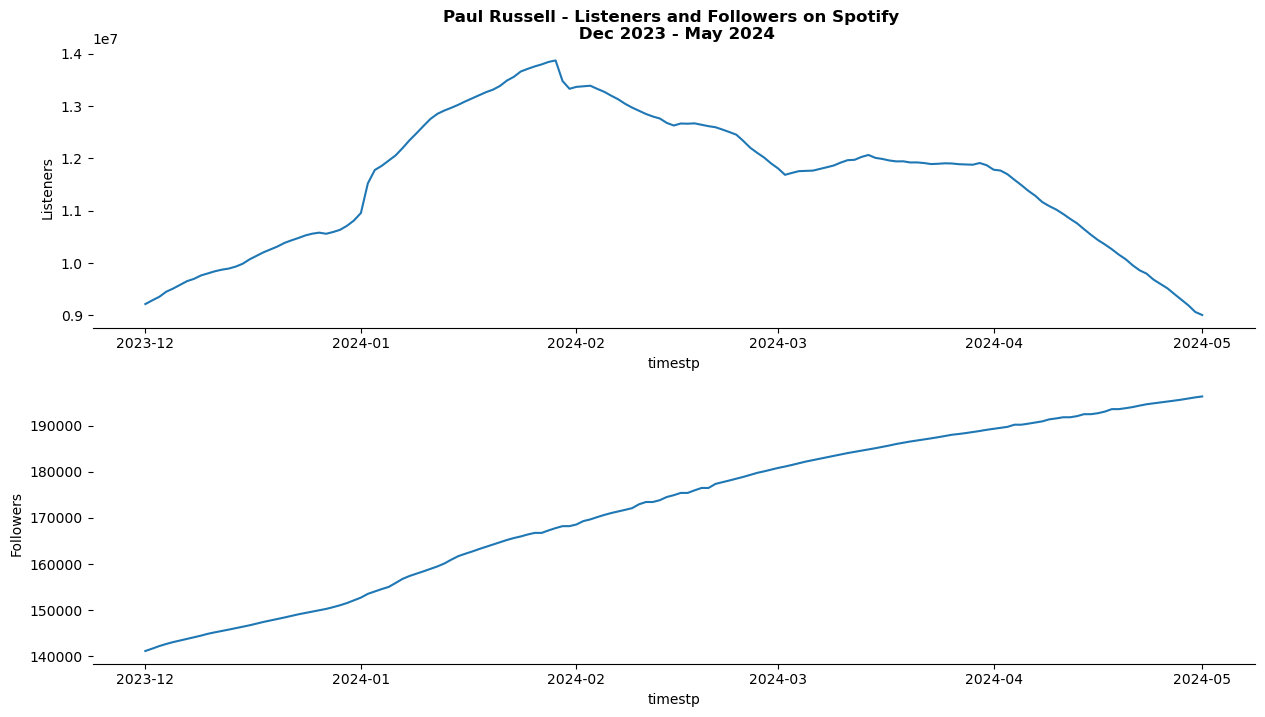

In [80]:
fig, axs = plt.subplots(2,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.lineplot(x='timestp',y='value',data=df.loc[df['Metric'] == 'listeners'], ax=axs[0])
sns.lineplot(x='timestp',y='value',data=df.loc[df['Metric'] == 'followers'], ax=axs[1])

axs[0].set_title('Paul Russell - Listeners and Followers on Spotify \n Dec 2023 - May 2024', fontweight='bold')
axs[0].set_ylabel('Listeners')
axs[1].set_ylabel('Followers')

plt.show()

## Career History